In [35]:
import os
import h5py
import gvar   as gv
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

# $R_{A_1}(\mathbb{p}>0)$

$$
 R_{A_1} = \frac{ C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{p}_\perp,t,T) \,\, C_{D^*_a\rightarrow B_{1S}}^{A_j}(\mathbf{p}_\perp,t,T) }{  C_{D^*_a\rightarrow D^*_{1S}}^{V_4}(\mathbf{0},t,T) \,\,   C_{B_{1S}\rightarrow B_{1S}}^{V_4}(\mathbf{0},t,T) } \frac{Z_{D^*_a}(\mathbf p_\perp)}{\sqrt{Z_{D^*_a}(0)Z_{D_{1S}^*}(0)}} \frac{{M_{D^*}}^2}{{E^2_{D^*}}(\mathbb p)} e^{-({E_{D^*}}(\mathbb p) - M_{D^*})T}
$$ 

In [88]:
from b2heavy.ThreePointFunctions.types3pts import RatioFileString, RatioIO, Ratio, ratio_prerequisites, ratio_correction_factor
from b2heavy.TwoPointFunctions.utils import jkCorr
from b2heavy.FnalHISQMetadata import params

ens = 'Coarse-1'
mom = '300'
jk  = 11

mdata = params(ens)
Ta,Tb = mdata['hSinks']

heavy = '_k' + mdata['kBStr']
light = '_k' + mdata['kDStr']
qq    = '_m' + mdata['mlStr']

data = h5py.File(f'/Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/{mdata["hdf5File2"]}')
data = data['data']

## factor

In [89]:
from b2heavy.ThreePointFunctions.utils import read_config_fit

frm = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/lattice24'

p2 = read_config_fit(f'fit2pt_config_{ens}_Dst_{mom}',jk=False,path=frm)[-1]
p0 = read_config_fit(f'fit2pt_config_{ens}_Dst_000',jk=False,path=frm)[-1]

e0 = p2['E'][0]
m0 = p0['E'][0]
Z0_1S = np.exp(p0['Z_1S_Unpol'][0])**2 * 2 * m0
Z0_d = np.exp(p0['Z_d_Unpol'][0])**2 * 2 * m0
Zp_1S = np.exp(p2['Z_1S_Bot'  ][0])**2 * 2 * e0
Zp_d = np.exp(p2['Z_d_Bot'  ][0])**2 * 2 * e0


In [90]:
req = dict(
    E0 = e0.mean,
    m0 = m0.mean,
    Z0   = {'1S':gv.mean(Z0_1S),'d':gv.mean(Z0_d)},
    Zbot = {'1S':gv.mean(Zp_1S),'d':gv.mean(Zp_d)},
    wrecoil = e0.mean/m0.mean
)

In [91]:
req

{'E0': 1.1795030243540996,
 'm0': 1.0811885828863745,
 'Z0': {'1S': 4.834848433376765, 'd': 0.04165271597466671},
 'Zbot': {'1S': 1.1715987932859104, 'd': 0.026111483753158932},
 'wrecoil': 1.0909318161733281}

## built-in

In [92]:
io = RatioIO(ens,'RA1',mom,PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')
ra1 = Ratio(io,jkBin=11,verbose=True,smearing=['1S','RW'],**req)

P5_A2_V2_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p300 found in /Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/l3264f211b600m00507m0507m628-HISQscript.hdf5
V1_V4_V1_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000 found in /Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/l3264f211b600m00507m0507m628-HISQscript.hdf5
P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000 found in /Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/l3264f211b600m00507m0507m628-HISQscript.hdf5
P5_A2_V2_T13_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p300 found in /Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/l3264f211b600m00507m0507m628-HISQscript.hdf5
V1_V4_V1_T13_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000 found in /Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/l3264f211b600m00507m0507m628-HISQscript.hdf5
P5_V4_P5_T13_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000 found in /Users/pietro/code/data_ana

## from scratch

$C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{p}_\perp,t,T)$

In [93]:
file1 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_A3_V3_',Ta,heavy,'1S',qq,light,mom)
n1a = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
])

print(f'{file1 = }')
print(f'{file2 = }')


# ==============================================================
file1 = RatioFileString('P5_A2_V2_',Tb,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_A3_V3_',Tb,heavy,'1S',qq,light,mom)
n1b = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
])

file1 = 'P5_A2_V2_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p300'
file2 = 'P5_A3_V3_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p300'


In [94]:
# x = data[RatioFileString('P5_V3_V2_',Ta,heavy,'1S',qq,light,'100')][:]

# plt.errorbar(
#     range(x.shape[1]),
#     x.mean(axis=0),
#     x.std(axis=0),
#     fmt='.'
# )

$C_{D^*_a\rightarrow B_{1S}}^{A_j}(\mathbf{p}_\perp,t,T) \longleftarrow C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{p}_\perp,T-t,T)$

In [95]:
n2a = np.flip(n1a,axis=2)
n2b = np.flip(n1b,axis=2)

$C_{B_{1S}\rightarrow B_{1S}}^{V_4}(\mathbf{0},t,T)$

In [96]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')
file2 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,heavy,'000')

d1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d1b = jkCorr(data[file2][:,:Ta+1], bsize=jk)

print(f'{file1 = }')
print(f'{file2 = }')

file1 = 'P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file2 = 'P5_V4_P5_T13_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'


$C_{D^*_a\rightarrow D^*_{1S}}^{V_4}(\mathbf{0},t,T)$

In [97]:
file1 = RatioFileString('V1_V4_V1_',Ta,light,'1S',qq,light,'000')
file2 = RatioFileString('V1_V4_V1_',Tb,light,'1S',qq,light,'000')

d2a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d2b = jkCorr(data[file2][:,:Ta+1], bsize=jk)

print(f'{file1 = }')
print(f'{file2 = }')

file1 = 'V1_V4_V1_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file2 = 'V1_V4_V1_T13_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [104]:
ra = (n1a * n2a).sum(axis=0) / d1a / d2a
rb = (n1b * n2b).sum(axis=0) / d1b / d2b

In [147]:
e_deta = np.exp((req['E0']-req['m0'])*Ta)
e_detb = np.exp((req['E0']-req['m0'])*Tb)

fa = req['Zbot']['1S'] / np.sqrt(req['Z0']['1S'] * req['Z0']['1S']) * \
    req['m0']**2/req['E0']**2 / e_deta

fb = req['Zbot']['1S'] / np.sqrt(req['Z0']['1S'] * req['Z0']['1S']) * \
    req['m0']**2/req['E0']**2 / e_detb

In [148]:
ra *= fa
rb *= fb

### smooth

In [149]:
ra1 = ra*e_deta /2 + rb*e_detb /4 + np.roll(rb*e_detb ,-1,axis=1)/4

<ErrorbarContainer object of 3 artists>

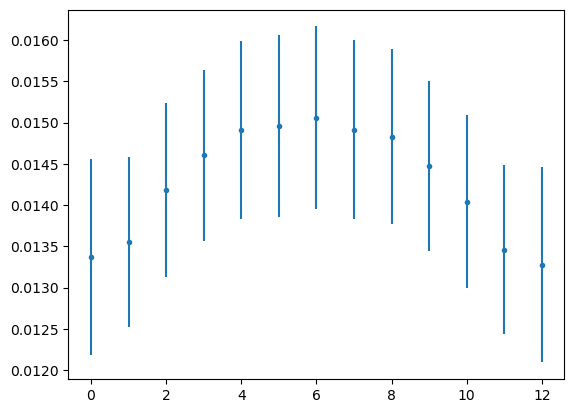

In [150]:
plt.errorbar(
    range(ra1.shape[1]),
    ra1.mean(axis=0),
    ra1.std(axis=0) * np.sqrt(ra1.shape[0]-1),
    fmt='.'
)

# $R_{A_1}(\mathbb{p}=0)$

$$
 R_{A_1} = \frac{ C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{0},t,T) \,\, C_{D^*_a\rightarrow B_{1S}}^{A_j}(\mathbf{0},t,T) }{  C_{D^*_a\rightarrow D^*_{1S}}^{V_4}(\mathbf{0},t,T) \,\,   C_{B_{1S}\rightarrow B_{1S}}^{V_4}(\mathbf{0},t,T) } \frac{Z_{D^*_a}(\mathbf 0)}{\sqrt{Z_{D^*_a}(0)Z_{D_{1S}^*}(0)}}
$$ 

In [7]:
file1 = RatioFileString('P5_A1_V1_',Ta,heavy,'1S',qq,light,'000')
file2 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'000')
file3 = RatioFileString('P5_A3_V3_',Ta,heavy,'1S',qq,light,'000')

print(f'{file1 = }')
print(f'{file2 = }')
print(f'{file3 = }')

n1a = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])

# ===================================================================
file1 = RatioFileString('P5_A1_V1_',Tb,heavy,'1S',qq,light,'000')
file2 = RatioFileString('P5_A2_V2_',Tb,heavy,'1S',qq,light,'000')
file3 = RatioFileString('P5_A3_V3_',Tb,heavy,'1S',qq,light,'000')

n1b = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])

file1 = 'P5_A1_V1_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file2 = 'P5_A2_V2_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file3 = 'P5_A3_V3_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [8]:
file1 = RatioFileString('V1_A1_P5_',Ta,light,'1S',qq,heavy,'000')
file2 = RatioFileString('V1_A2_P5_',Ta,light,'1S',qq,heavy,'000')
file3 = RatioFileString('V1_A3_P5_',Ta,light,'1S',qq,heavy,'000')

print(f'{file1 = }')
print(f'{file2 = }')
print(f'{file3 = }')

n2a = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])


# ===================================================================
file1 = RatioFileString('V1_A1_P5_',Tb,light,'1S',qq,heavy,'000')
file2 = RatioFileString('V1_A2_P5_',Tb,light,'1S',qq,heavy,'000')
file3 = RatioFileString('V1_A3_P5_',Tb,light,'1S',qq,heavy,'000')

n2b = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])

file1 = 'V1_A1_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file2 = 'V1_A2_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file3 = 'V1_A3_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'


In [9]:
file1 = RatioFileString('V1_V4_V1_',Ta,light,'1S',qq,light,'000')

print(f'{file1 = }')

d1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)


# ================================================================
file1 = RatioFileString('V1_V4_V1_',Tb,light,'1S',qq,light,'000')
d1b = jkCorr(data[file1][:,:Ta+1], bsize=jk)

file1 = 'V1_V4_V1_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [10]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')

print(f'{file1 = }')

d2a = jkCorr(data[file1][:,:Ta+1],bsize=jk)


# ================================================================
file1 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,heavy,'000')
d2b = jkCorr(data[file1][:,:Ta+1],bsize=jk)

file1 = 'P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'


In [11]:
ra = (n1a*n2a).sum(axis=0)/d1a/d2a
rb = (n1b*n2b).sum(axis=0)/d1b/d2b

### smooth

In [12]:
ra1 = ra/2 + rb/4 + np.roll(rb,-1,axis=1)/4

In [13]:
ra1.mean(axis=0)

array([-0.96981419, -0.83673726, -0.83158114, -0.82871928, -0.82533275,
       -0.82561106, -0.82497621, -0.82858643, -0.83463746, -0.84075337,
       -0.85173603, -0.86519267, -0.97390577])

## build-in

In [17]:
io = RatioIO(ens,'ZRA1','000',PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')

req = ratio_prerequisites(ens,'ZRA1','000',readfrom=frm)
zra1 = Ratio(io,jkBin=11,smearing=['1S','RW'],**req)

In [18]:
zra1.format()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 {'1S': array([-0.970(23), -0.837(19), -0.832(19), -0.829(19), -0.825(18),
         -0.826(19), -0.825(19), -0.829(19), -0.835(19), -0.841(19),
         -0.852(20), -0.865(20), -0.996(23)], dtype=object),
  'RW': array([-0.1004(26), -0.0761(19), -0.0767(20), -0.0774(22), -0.0776(23),
         -0.0779(24), -0.0786(27), -0.0795(29), -0.0804(30), -0.0810(30),
         -0.0820(29), -0.0836(29), -0.0940(32)], dtype=object)})

In [19]:
req

{'E0': 1.0811885828863745,
 'm0': 1.0811885828863745,
 'Z0': {'1S': 4.834848433376765, 'd': 0.04165271597466671},
 'Zpar': {'1S': None, 'd': None},
 'Zbot': {'1S': None, 'd': None},
 'Zp': {'1S': None, 'd': None},
 'wrecoil': 1.0,
 'jk': False}

# other checks

<ErrorbarContainer object of 3 artists>

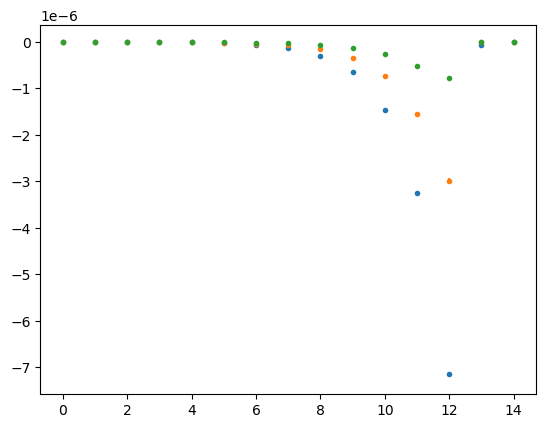

In [145]:
file1 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'100')
file2 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'200')
file3 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'300')

n1 = jkCorr(data[file1][:], bsize=jk)
n2 = jkCorr(data[file2][:], bsize=jk)
n3 = jkCorr(data[file3][:], bsize=jk)

tmax = 15
plt.errorbar(range(tmax),n1[:,:tmax].mean(axis=0),n1[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')
plt.errorbar(range(tmax),n2[:,:tmax].mean(axis=0),n2[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')
plt.errorbar(range(tmax),n3[:,:tmax].mean(axis=0),n3[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')

<ErrorbarContainer object of 3 artists>

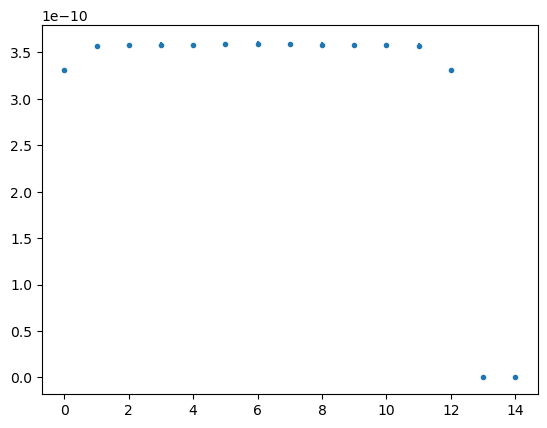

In [143]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')

n1 = jkCorr(data[file1][:], bsize=jk)

tmax = 15
plt.errorbar(range(tmax),n1[:,:tmax].mean(axis=0),n1[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')

In [154]:
frm = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/lattice24'

p0 = read_config_fit(f'fit2pt_config_{ens}_Dst_000',jk=False,path=frm)[-1]
m0 = p0['E'][0]
Z0_1S = np.exp(p0['Z_1S_Unpol'][0])**2 * 2 * m0
Z0_d  = np.exp(p0['Z_d_Unpol' ][0])**2 * 2 * m0

for mom in ['100','200','300']:
    p2 = read_config_fit(f'fit2pt_config_{ens}_Dst_{mom}',jk=False,path=frm)[-1]

    e0 = p2['E'][0]
    Zp_1S = np.exp(p2['Z_1S_Bot'][0])**2 * 2 * e0
    Zp_d = np.exp(p2['Z_d_Bot'  ][0])**2 * 2 * e0

    fa = Zp_1S / np.sqrt(Z0_1S * Z0_1S) * m0**2/e0**2 * np.exp((e0-m0)*Ta)

    print(fa)


0.94(28)
1.00(31)
0.66(33)
